In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

In [2]:
anime_data_d =pd.read_csv("./anime.csv")

In [33]:
anime_data = anime_data_d[(anime_data_d["Episodes"] != "?") & (anime_data_d["Rating"].isna() == False)]

In [34]:
sd_anime_data = anime_data.sort_values(by='Rating')
s_anime_data = anime_data.sort_values(by='Rating', ascending=False)

In [35]:
g = None
anime_by_theme = s_anime_data.groupby(by='Theme')
anime_by_theme.groups
s_anime_data.iloc[1485]
s_anime_data[s_anime_data["Title"]=='Nurarihyon no Mago: Sennen Makyou Recaps']


,Title,Production,Episodes,Source,Genre,Airdate,Rating,Voters,Theme
1841,Nurarihyon no Mago: Sennen Makyou Recaps,Studio Deen,2,Manga,"Action,Supernatural",NaN,6.67,"11,207",Demons


In [36]:
s_anime_data.loc[1485]

Title         Mahou Shoujo Lyrical Nanoha: The Movie 2nd A's
Production                                        Seven Arcs
Episodes                                                   1
Source                                              Original
Genre                             Action,Comedy,Drama,Sci-Fi
Airdate                                                  NaN
Rating                                                  8.15
Voters                                                21,596
Theme                                                      -
Name: 1485, dtype: object

In [37]:
sorted(anime_by_theme.groups.keys())

['-',
 'ADV Films',
 'ADV Films,Discotek Media',
 'ADV Films,Funimation',
 'ADV Films,Funimation,OLM Digital',
 'ADV Films,Sentai Filmworks',
 'Anchor Bay Films',
 'AnimEigo',
 'Aniplex of America',
 'Bandai Entertainment',
 'Bandai Entertainment,Central Park Media',
 'Bandai Entertainment,Funimation',
 'Cars',
 'Cars,Police',
 'Central Park Media',
 'Central Park Media,Discotek Media',
 'Central Park Media,Funimation',
 'Central Park Media,Media Blasters',
 'Crunchyroll',
 'Crunchyroll,Discotek Media',
 'Crunchyroll,Funimation',
 'Demons',
 'Demons,Game',
 'Demons,Harem',
 'Demons,Harem,School',
 'Demons,Historical',
 'Demons,Historical,Samurai',
 'Demons,Martial Arts',
 'Demons,Martial Arts,Super Power',
 'Demons,Mecha',
 'Demons,Mecha,Super Power',
 'Demons,Military',
 'Demons,Parody,Super Power',
 'Demons,School',
 'Demons,Super Power',
 'Demons,Vampire',
 'Discotek Media',
 'Discotek Media,Media Blasters,Tokyopop',
 'Discotek Media,Ponycan USA',
 'Flatiron Film Company',
 'Funimat

In [38]:
def get_animes_id_by_themes(themes_, gr):
    themes = set(themes_)
    th = ','.join(sorted(themes))
    ans = []
    print(themes, th)
    
    keys_ = gr.groups.keys()
    for i in themes:
        for j in keys_:
            if i in j:
                ans.extend(list(gr.groups[j]))
    ans = list(set(ans))
    return ans

def get_animes_id_by_theme(theme, gr):
    ans = []
    print(theme)
    
    keys_ = gr.groups.keys()
    for j in keys_:
        if theme in j:
            ans.extend(list(gr.groups[j]))
    ans = list(set(ans))
    return ans
    

In [39]:
def get_info_ab_themes(themes):
    ans = pd.DataFrame({"theme": [], "rating": []})
    for i in themes:
        theme = s_anime_data.loc[get_animes_id_by_theme(i, anime_by_theme)]
        for j in list(theme["Rating"]):
            ans = ans.append({"theme": i, "rating": j}, ignore_index=True) 
    
    return ans
        
# harems = s_anime_data.loc[get_animes_id_by_theme("Harem", anime_by_theme)]
# harems_rate = harems["Rating"].mean()

# Parody = s_anime_data.loc[get_animes_id_by_theme("Parody", anime_by_theme)]
# Parody_rate = Parody["Rating"].mean()

# Space = s_anime_data.loc[get_animes_id_by_theme("Space", anime_by_theme)]
# Space_rate = Space["Rating"].mean()

# Samurai = s_anime_data.loc[get_animes_id_by_theme("Samurai", anime_by_theme)]
# Parody_rate = Samurai["Rating"].mean()

# Mecha = s_anime_data.loc[get_animes_id_by_theme("Mecha", anime_by_theme)]
# Mecha_rate = Mecha["Rating"].mean()

themes = ["Samurai", "Space", "Harem", 'Kids', "Game", 'Demons,Mecha', 'Demons,Harem', 'Harem,School', 'Harem,Space', 'Super Power', "Music,Super Power"]

data = get_info_ab_themes(themes)



Samurai
Space
Harem
Kids
Game
Demons,Mecha
Demons,Harem
Harem,School
Harem,Space
Super Power
Music,Super Power


In [40]:
means = [data[data['theme']==i]['rating'].mean() for i in themes]

Text(0,0.5,'Средняя оценка')

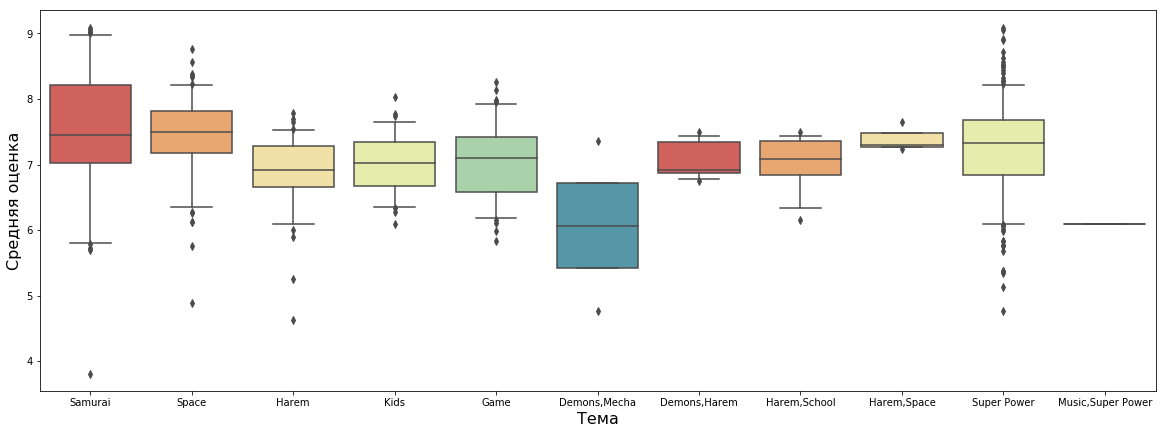

In [41]:
size = (1, 2)

fig, axes = plt.subplots(*size, figsize=(10 * size[1], 7*size[0]))

pal = sns.color_palette("Spectral")

#bp = sns.boxplot(x='theme', y='rating', data=data, whis=[5, 95], palette=pal, ax=axes[0])
bp = sns.boxplot(x='theme', y='rating', data=data, whis=[5, 95], palette=sns.color_palette("Spectral"), ax=plt.subplot2grid(size, (0, 0), colspan=2))
#bp.axes.set_title("", fontsize=16)
bp.axes.set_xlabel("Тема", fontsize=16)
bp.axes.set_ylabel("Средняя оценка", fontsize=16)

#sns.barplot(data=means, n_boot=len(means), ax=axes[1], palette=pal)

In [46]:
keys = sorted(anime_by_theme.groups.keys())[1:]
themes_all = [i for i in keys]


In [52]:
data_all = get_info_ab_themes(themes_all)
means_all = [(i, data_all[data_all['theme']==i]['rating'].mean()) for i in themes_all]


ADV Films
ADV Films,Discotek Media
ADV Films,Funimation
ADV Films,Funimation,OLM Digital
ADV Films,Sentai Filmworks
Anchor Bay Films
AnimEigo
Aniplex of America
Bandai Entertainment
Bandai Entertainment,Central Park Media
Bandai Entertainment,Funimation
Cars
Cars,Police
Central Park Media
Central Park Media,Discotek Media
Central Park Media,Funimation
Central Park Media,Media Blasters
Crunchyroll
Crunchyroll,Discotek Media
Crunchyroll,Funimation
Demons
Demons,Game
Demons,Harem
Demons,Harem,School
Demons,Historical
Demons,Historical,Samurai
Demons,Martial Arts
Demons,Martial Arts,Super Power
Demons,Mecha
Demons,Mecha,Super Power
Demons,Military
Demons,Parody,Super Power
Demons,School
Demons,Super Power
Demons,Vampire
Discotek Media
Discotek Media,Media Blasters,Tokyopop
Discotek Media,Ponycan USA
Flatiron Film Company
Funimation
Funimation,Geneon Entertainment USA
GKIDS
Game
Game,Mecha
Game,Military
Game,Military,Psychological
Game,School
Geneon Entertainment USA,Sentai Filmworks
Harem


In [61]:
sorted_data = sorted(means_all, key=lambda x: x[1])


In [117]:
all_themes = sorted(set(reduce(lambda a, b: a + b, map(lambda x: x.split(','), [i for i in themes_all]))))
data_all_1 = dict([(i, get_info_ab_themes([i])) for i in all_themes])

ADV Films
Anchor Bay Films
AnimEigo
Aniplex of America
Bandai Entertainment
Cars
Central Park Media
Crunchyroll
Demons
Discotek Media
Flatiron Film Company
Funimation
GKIDS
Game
Geneon Entertainment USA
Harem
Historical
Josei
Kids
Maiden Japan
Manga Entertainment
Martial Arts
Mecha
Media Blasters
Military
Music
NYAV Post
Netflix
Nozomi Entertainment
OLM Digital
Parody
Police
Ponycan USA
Psychological
Samurai
School
Seinen
Sentai Filmworks
Shoujo
Shounen
Shout! Factory
Space
Super Power
Tokyopop
Urban Vision
VIZ Media
Vampire
Warner Bros. Japan
bilibili


In [130]:

#sorted_data_1 = filter(lambda x: len(s_anime_data[s_anime_data['Theme'] == x])> 5, all_themes)
sorted_data_1 = list(filter(lambda x: len(x[1])> 5, data_all_1.items()))

means_all_1 = [(i[0], data_all_1[i[0]]['rating'].mean()) for i in sorted_data_1]
means_all_1 = sorted( means_all_1, key=lambda x: x[1])

In [131]:
means_all_1

[('Central Park Media', 6.3928571428571415),
 ('Media Blasters', 6.544285714285714),
 ('Discotek Media', 6.661333333333334),
 ('ADV Films', 6.761818181818182),
 ('Funimation', 6.869101123595504),
 ('Harem', 6.890379746835442),
 ('Crunchyroll', 6.929090909090909),
 ('Sentai Filmworks', 6.9590000000000005),
 ('Kids', 7.005476190476191),
 ('Game', 7.0152112676056335),
 ('Martial Arts', 7.0660869565217395),
 ('School', 7.096685082872928),
 ('Vampire', 7.13561403508772),
 ('Mecha', 7.158864468864469),
 ('Police', 7.1624193548387085),
 ('Shounen', 7.226453488372093),
 ('Demons', 7.2329365079365076),
 ('Shoujo', 7.23578947368421),
 ('Seinen', 7.236666666666666),
 ('Super Power', 7.265364238410597),
 ('Music', 7.311481481481481),
 ('Psychological', 7.373188405797101),
 ('Military', 7.394147465437787),
 ('Space', 7.422307692307692),
 ('Samurai', 7.492191780821918),
 ('Historical', 7.53048275862069),
 ('Aniplex of America', 7.546),
 ('Cars', 7.6225),
 ('Parody', 7.775555555555554)]

In [109]:
sorted( means_all_1, key=lambda x: x[1])

[('Discotek Media', 6.661333333333334),
 ('Funimation', 6.869101123595504),
 ('Harem', 6.890379746835442),
 ('Sentai Filmworks', 6.9590000000000005),
 ('Kids', 7.005476190476191),
 ('Game', 7.0152112676056335),
 ('Martial Arts', 7.0660869565217395),
 ('School', 7.096685082872928),
 ('Vampire', 7.13561403508772),
 ('Mecha', 7.158864468864469),
 ('Police', 7.1624193548387085),
 ('Shounen', 7.226453488372093),
 ('Demons', 7.2329365079365076),
 ('Shoujo', 7.23578947368421),
 ('Seinen', 7.236666666666666),
 ('Super Power', 7.265364238410597),
 ('Music', 7.311481481481481),
 ('Psychological', 7.373188405797101),
 ('Military', 7.394147465437787),
 ('Space', 7.422307692307692),
 ('Samurai', 7.492191780821918),
 ('Historical', 7.53048275862069),
 ('Aniplex of America', 7.546),
 ('Cars', 7.6225),
 ('Parody', 7.775555555555554)]

In [140]:
s_anime_data[s_anime_data["Theme"]=='Harem']

,Title,Production,Episodes,Source,Genre,Airdate,Rating,Voters,Theme
227,Kore wa Zombie Desu ka? of the Dead,Studio Deen,10,Light novel,"Action,Comedy,Supernatural,Ecchi","Apr 5, 2012",7.52,"346,733",Harem
712,"Kore wa Zombie Desu ka? of the Dead: Hai, Mino...",Studio Deen,1,Light novel,"Action,Comedy,Supernatural,Ecchi",NaN,7.46,"97,589",Harem
596,Kore wa Zombie Desu ka? OVA,Studio Deen,2,Light novel,"Action,Comedy,Supernatural,Ecchi",NaN,7.40,"122,709",Harem
136,Kore wa Zombie Desu ka?,Studio Deen,12,Light novel,"Action,Comedy,Supernatural,Ecchi","Jan 11, 2011",7.39,"566,144",Harem
777,Trinity Seven Movie 2: Heavens Library to Crim...,Seven Arcs Pictures,1,Manga,"Action,Comedy,Fantasy,Ecchi",NaN,7.35,"84,386",Harem
403,Seirei Gensouki,TMS Entertainment,12,Light novel,"Action,Adventure,Drama,Fantasy,Romance","Jul 6, 2021, 02:00 (JST)",7.04,"197,640",Harem
1060,Arifureta Shokugyou de Sekai Saikyou Specials,asread.,2,Light novel,"Action,Adventure,Fantasy",NaN,6.66,"47,765",Harem
168,Arifureta Shokugyou de Sekai Saikyou,asread.,13,Light novel,"Action,Adventure,Fantasy","Jul 8, 2019, 23:30 (JST)",6.64,"474,136",Harem
1846,Mahou Sensei Negima!: Introduction Film,Xebec,3,Manga,"Action,Comedy,Romance,Supernatural,Ecchi",NaN,6.63,"11,089",Harem
311,Ore dake Haireru Kakushi Dungeon,Okuruto Noboru,12,Light novel,"Action,Adventure,Fantasy,Ecchi","Jan 9, 2021, 02:25 (JST)",6.30,"258,400",Harem
